## Importação de biblioteca e Dados

In [480]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as pl
import bar_chart_race as bcr
from itertools import combinations
from collections import Counter
import chart_studio.plotly as py
import chart_studio
import plotly.graph_objs as pg
from plotly.subplots import make_subplots

In [134]:
pd.options.display.max_rows = 500
pd.options.display.max_columns = 50

In [135]:
df = pd.read_excel("US Superstore data.xlsx")

## Visualização dos dados

In [136]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [137]:
list(df.columns)

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country',
 'City',
 'State',
 'Postal Code',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [138]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [139]:
df["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [140]:
df["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [141]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [142]:
df["Country"].unique()

array(['United States'], dtype=object)

In [143]:
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [144]:
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7937,7938,CA-2017-166093,2017-08-17,2017-08-24,Standard Class,RW-19540,Rick Wilson,Corporate,United States,Brentwood,California,94513,West,OFF-AP-10001058,Office Supplies,Appliances,Sanyo 2.5 Cubic Foot Mid-Size Office Refrigera...,2518.290,9,0.0,654.7554
4141,4142,CA-2016-136287,2016-06-13,2016-06-17,Standard Class,SS-20590,Sonia Sunley,Consumer,United States,Wichita,Kansas,67212,Central,OFF-LA-10003148,Office Supplies,Labels,Avery 51,18.900,3,0.0,8.6940
5240,5241,CA-2016-116561,2016-09-11,2016-09-17,Standard Class,EB-14110,Eugene Barchas,Consumer,United States,San Jose,California,95123,West,OFF-BI-10001658,Office Supplies,Binders,GBC Standard Therm-A-Bind Covers,39.872,2,0.2,12.9584
314,315,CA-2014-167850,2014-08-09,2014-08-16,Standard Class,AG-10525,Andy Gerbode,Corporate,United States,Saint Petersburg,Florida,33710,South,TEC-PH-10002398,Technology,Phones,AT&T 1070 Corded Phone,178.384,2,0.2,22.2980
2586,2587,CA-2017-131695,2017-06-30,2017-07-06,Standard Class,RA-19285,Ralph Arnett,Consumer,United States,New York City,New York,10024,East,OFF-ST-10001476,Office Supplies,Storage,Steel Personal Filing/Posting Tote,248.570,7,0.0,67.1139
9307,9308,CA-2014-128237,2014-03-25,2014-03-30,Standard Class,CA-12265,Christina Anderson,Consumer,United States,San Francisco,California,94110,West,OFF-AR-10003338,Office Supplies,Art,"Eberhard Faber 3 1/2"" Golf Pencils",14.880,2,0.0,3.7200
2904,2905,CA-2016-153577,2016-06-27,2016-07-01,Standard Class,KH-16330,Katharine Harms,Corporate,United States,Highland Park,Illinois,60035,Central,FUR-CH-10003981,Furniture,Chairs,Global Commerce Series Low-Back Swivel/Tilt Ch...,539.658,3,0.3,-7.7094
6371,6372,CA-2017-143035,2017-10-03,2017-10-05,Second Class,CC-12430,Chuck Clark,Home Office,United States,New York City,New York,10009,East,FUR-FU-10001934,Furniture,Furnishings,Magnifier Swing Arm Lamp,83.920,4,0.0,21.8192
3041,3042,CA-2017-149559,2017-09-11,2017-09-12,Same Day,KF-16285,Karen Ferguson,Home Office,United States,Long Beach,California,90805,West,OFF-PA-10003172,Office Supplies,Paper,Xerox 1996,12.960,2,0.0,6.2208
6903,6904,CA-2017-111220,2017-09-02,2017-09-08,Standard Class,JS-15595,Jill Stevenson,Corporate,United States,Chicago,Illinois,60653,Central,OFF-AP-10003278,Office Supplies,Appliances,Belkin 7-Outlet SurgeMaster Home Series,5.588,2,0.8,-15.0876


In [145]:
print(f"O Data Frame tem {df.shape[0]} linhas e {df.shape[1]} colunas")

O Data Frame tem 9994 linhas e 21 colunas


In [146]:
df = df.rename(columns = {"Row ID": "ID Linha","Order ID": "ID Pedido","Order Date": "Data do Pedido", "Ship Date": "Data de envio", "Ship Mode": "Modo de envio", "Customer ID": "ID Cliente", "Customer Name": "Nome Cliente", "Segment": "Segmento", "Country": "País", "City":"Cidade", "State":"Estado","Postal Code":"Código Postal",
"Region": "Região", "Product ID":"ID Produto", "Category": "Categoria", "Sub-Category": "Sub-Categoria", "Product Name":"Nome do Produto", "Sales":"Valor do Pedido", "Quantity":"Quantidade", "Discount": "Desconto", "Profit": "Lucro"})

In [147]:
df.head()

,ID Linha,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Limpeza dos dados

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID Linha         9994 non-null   int64         
 1   ID Pedido        9994 non-null   object        
 2   Data do Pedido   9994 non-null   datetime64[ns]
 3   Data de envio    9994 non-null   datetime64[ns]
 4   Modo de envio    9994 non-null   object        
 5   ID Cliente       9994 non-null   object        
 6   Nome Cliente     9994 non-null   object        
 7   Segmento         9994 non-null   object        
 8   País             9994 non-null   object        
 9   Cidade           9994 non-null   object        
 10  Estado           9994 non-null   object        
 11  Código Postal    9994 non-null   int64         
 12  Região           9994 non-null   object        
 13  ID Produto       9994 non-null   object        
 14  Categoria        9994 non-null   object 

In [149]:
df.isnull().values.any()

False

In [150]:
df[df.duplicated()]

,ID Linha,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro


In [151]:
df.loc[df["Quantidade"] == 0]

,ID Linha,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro


In [152]:
df.loc[df["Valor do Pedido"] == 0]

,ID Linha,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro


In [153]:
Group_nome_client=df.groupby(df["Nome Cliente"], as_index=False)["ID Cliente"].nunique()
Group_nome_client

,Nome Cliente,ID Cliente
0,Aaron Bergman,1
1,Aaron Hawkins,1
2,Aaron Smayling,1
3,Adam Bellavance,1
4,Adam Hart,1
...,...,...
788,Xylona Preis,1
789,Yana Sorensen,1
790,Yoseph Carroll,1
791,Zuschuss Carroll,1


In [154]:
Group_nome_client.loc[Group_nome_client["ID Cliente"] > 1]

,Nome Cliente,ID Cliente


In [155]:
df.drop(['ID Linha'], axis='columns', inplace=True)

In [156]:
df.head()

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [157]:
df["Tempo de Envio"] = df["Data de envio"] - df["Data do Pedido"]

In [158]:
df.head(20)

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro,Tempo de Envio
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days
5,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,5 days
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,5 days
7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,5 days
8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,5 days
9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,5 days


In [159]:
print(df["Tempo de Envio"].max())
print(df["Tempo de Envio"].min())

7 days 00:00:00
0 days 00:00:00


In [160]:
print(df["Tempo de Envio"].median())

4 days 00:00:00


<AxesSubplot:xlabel='Tempo de Envio'>

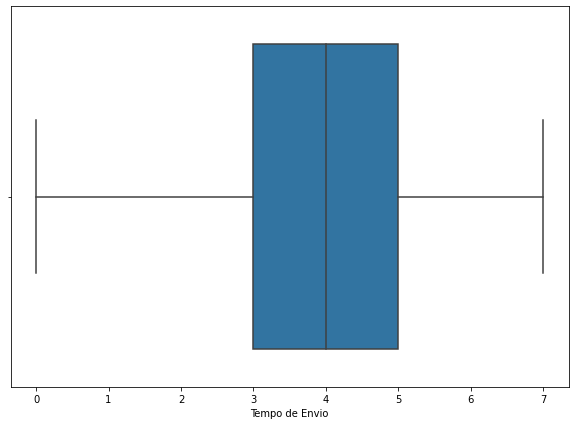

In [161]:
plt.figure(figsize =(10,7))
sb.boxplot(x=df["Tempo de Envio"].dt.days)


In [162]:
print(f'Quantidade de ID de produtos: {len(df["ID Produto"].unique())}')
print(f'Quantidade de produtos únicos: {len(df["Nome do Produto"].unique())}')

Quantidade de ID de produtos: 1862
Quantidade de produtos únicos: 1850


In [163]:
Group_nome_prod=df.groupby(df["Nome do Produto"], as_index=False)["ID Produto"].nunique()
Group_nome_prod

,Nome do Produto,ID Produto
0,"""While you Were Out"" Message Book, One Form pe...",1
1,"#10 Gummed Flap White Envelopes, 100/Box",1
2,#10 Self-Seal White Envelopes,1
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",1
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",2
...,...,...
1845,iKross Bluetooth Portable Keyboard + Cell Phon...,1
1846,iOttie HLCRIO102 Car Mount,1
1847,iOttie XL Car Mount,1
1848,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,1


In [164]:
Group_nome_prod.loc[Group_nome_prod["ID Produto"] > 1]

,Nome do Produto,ID Produto
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",2
259,Avery Non-Stick Binders,2
537,Easy-staple paper,8
591,Eldon Wave Desk Accessories,2
942,KI Adjustable-Height Table,2
1217,Okidata C610n Printer,2
1249,"Peel & Seel Recycled Catalog Envelopes, Brown",2
1297,Prang Drawing Pencil Set,2
1493,Staple envelope,9
1494,Staple holder,3


In [165]:
Group_ID_prod=df.groupby(df["ID Produto"], as_index=False)["Nome do Produto"].nunique()
Group_ID_prod

,ID Produto,Nome do Produto
0,FUR-BO-10000112,1
1,FUR-BO-10000330,1
2,FUR-BO-10000362,1
3,FUR-BO-10000468,1
4,FUR-BO-10000711,1
...,...,...
1857,TEC-PH-10004912,1
1858,TEC-PH-10004922,1
1859,TEC-PH-10004924,1
1860,TEC-PH-10004959,1


In [166]:
Group_ID_prod.loc[Group_ID_prod["Nome do Produto"] > 1]

,ID Produto,Nome do Produto
18,FUR-BO-10002213,2
65,FUR-CH-10001146,2
183,FUR-FU-10001473,2
284,FUR-FU-10004017,2
290,FUR-FU-10004091,2
295,FUR-FU-10004270,2
310,FUR-FU-10004848,2
311,FUR-FU-10004864,2
387,OFF-AP-10000576,2
506,OFF-AR-10001149,2


In [167]:
df.loc[df["ID Produto"] == "FUR-BO-10002213"]

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro,Tempo de Envio
2115,CA-2015-164882,2015-10-31,2015-10-31,Same Day,SG-20080,Sandra Glassco,Consumer,United States,Redlands,California,92374,West,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,425.833,1,0.15,20.0392,0 days
2471,US-2016-135923,2016-01-22,2016-01-28,Standard Class,CM-11935,Carlos Meador,Consumer,United States,Fayetteville,North Carolina,28314,South,FUR-BO-10002213,Furniture,Bookcases,"Sauder Forest Hills Library, Woodland Oak Finish",451.136,4,0.20,-67.6704,6 days
2808,CA-2015-148635,2015-07-25,2015-07-27,Second Class,MH-18025,Michelle Huthwaite,Consumer,United States,Seattle,Washington,98115,West,FUR-BO-10002213,Furniture,Bookcases,"Sauder Forest Hills Library, Woodland Oak Finish",704.900,5,0.00,56.3920,2 days
5079,US-2017-133312,2017-11-25,2017-11-29,Standard Class,BD-11500,Bradley Drucker,Consumer,United States,San Francisco,California,94122,West,FUR-BO-10002213,Furniture,Bookcases,"Sauder Forest Hills Library, Woodland Oak Finish",359.499,3,0.15,-29.6058,4 days
5918,US-2015-126977,2015-09-17,2015-09-23,Standard Class,PF-19120,Peter Fuller,Consumer,United States,New York City,New York,10035,East,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,2003.920,5,0.20,-25.0490,6 days
6535,CA-2014-128209,2014-11-17,2014-11-22,Standard Class,GT-14710,Greg Tran,Consumer,United States,Buffalo,New York,14215,East,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,4007.840,10,0.20,-50.0980,5 days
8712,US-2015-145422,2015-12-03,2015-12-07,Standard Class,PW-19240,Pierre Wener,Consumer,United States,San Francisco,California,94110,West,FUR-BO-10002213,Furniture,Bookcases,"Sauder Forest Hills Library, Woodland Oak Finish",359.499,3,0.15,-29.6058,4 days
9395,CA-2014-125997,2014-09-20,2014-09-23,First Class,MW-18220,Mitch Webber,Consumer,United States,New York City,New York,10011,East,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,801.568,2,0.20,-10.0196,3 days
9583,CA-2017-116127,2017-06-25,2017-06-27,Second Class,SB-20185,Sarah Brown,Consumer,United States,New York City,New York,10024,East,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,400.784,1,0.20,-5.0098,2 days
9649,CA-2016-107104,2016-11-26,2016-11-30,Standard Class,MS-17365,Maribeth Schnelling,Consumer,United States,Los Angeles,California,90045,West,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,3406.664,8,0.15,160.3136,4 days


In [168]:
df.loc[df["Nome do Produto"] == "Easy-staple paper"]

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro,Tempo de Envio
34,CA-2017-107727,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468,4 days
283,CA-2015-130883,2015-09-26,2015-10-02,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Portland,Oregon,97206,West,OFF-PA-10000474,Office Supplies,Paper,Easy-staple paper,141.760,5,0.2,47.8440,6 days
347,CA-2017-134306,2017-07-08,2017-07-12,Standard Class,TD-20995,Tamara Dahlen,Consumer,United States,Lowell,Massachusetts,1852,East,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,24.560,2,0.0,11.5432,4 days
666,CA-2017-132682,2017-06-08,2017-06-10,Second Class,TH-21235,Tiffany House,Corporate,United States,Dallas,Texas,75081,Central,OFF-PA-10000474,Office Supplies,Paper,Easy-staple paper,85.056,3,0.2,28.7064,2 days
1028,CA-2014-163552,2014-07-11,2014-07-15,Standard Class,LA-16780,Laura Armstrong,Corporate,United States,Hackensack,New Jersey,7601,East,OFF-PA-10000474,Office Supplies,Paper,Easy-staple paper,177.200,5,0.0,83.2840,4 days
1080,CA-2015-110016,2015-11-29,2015-12-04,Standard Class,BT-11395,Bill Tyler,Corporate,United States,Detroit,Michigan,48227,Central,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,19.920,4,0.0,9.3624,5 days
1083,US-2016-143819,2016-03-01,2016-03-05,Standard Class,KD-16270,Karen Daniels,Consumer,United States,Yonkers,New York,10701,East,OFF-PA-10003127,Office Supplies,Paper,Easy-staple paper,26.380,1,0.0,12.1348,4 days
1225,CA-2016-126004,2016-12-04,2016-12-05,First Class,BM-11140,Becky Martin,Consumer,United States,New York City,New York,10024,East,OFF-PA-10001685,Office Supplies,Paper,Easy-staple paper,40.560,4,0.0,19.8744,1 days
1451,CA-2016-133711,2016-11-26,2016-11-29,First Class,MC-17425,Mark Cousins,Corporate,United States,Mobile,Alabama,36608,South,OFF-PA-10001685,Office Supplies,Paper,Easy-staple paper,70.980,7,0.0,34.7802,3 days
1702,CA-2015-114069,2015-07-13,2015-07-15,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,New York City,New York,10035,East,OFF-PA-10000349,Office Supplies,Paper,Easy-staple paper,9.960,2,0.0,4.6812,2 days


## Transformação dos dados

In [169]:
df[["Ano do Pedido","Mês do Pedido","Dia do Pedido"]] = df["Data do Pedido"].astype(str).str.split("-",3,expand = True)
df[["Ano de Envio","Mês de Envio","Dia de Envio"]] = df["Data de envio"].astype(str).str.split("-",3,expand = True)

In [170]:
df[["Ano do Pedido","Mês do Pedido","Dia do Pedido"]] = df[["Ano do Pedido","Mês do Pedido","Dia do Pedido"]].astype("int64")
df[["Ano de Envio","Mês de Envio","Dia de Envio"]] = df[["Ano de Envio","Mês de Envio","Dia de Envio"]].astype("int64")

In [171]:
df.head()

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro,Tempo de Envio,Ano do Pedido,Mês do Pedido,Dia do Pedido,Ano de Envio,Mês de Envio,Dia de Envio
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days,2016,11,8,2016,11,11
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days,2016,11,8,2016,11,11
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days,2016,6,12,2016,6,16
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,2015,10,11,2015,10,18
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days,2015,10,11,2015,10,18


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   ID Pedido        9994 non-null   object         
 1   Data do Pedido   9994 non-null   datetime64[ns] 
 2   Data de envio    9994 non-null   datetime64[ns] 
 3   Modo de envio    9994 non-null   object         
 4   ID Cliente       9994 non-null   object         
 5   Nome Cliente     9994 non-null   object         
 6   Segmento         9994 non-null   object         
 7   País             9994 non-null   object         
 8   Cidade           9994 non-null   object         
 9   Estado           9994 non-null   object         
 10  Código Postal    9994 non-null   int64          
 11  Região           9994 non-null   object         
 12  ID Produto       9994 non-null   object         
 13  Categoria        9994 non-null   object         
 14  Sub-Categoria    9994 no

In [173]:
def preço_unitario(vendas,quantidade,desconto):
    
    preço_unitario = (vendas/(1-desconto))/quantidade
    
    return(preço_unitario)

#test
preço_unitario(320,4,0.2)

100.0

In [174]:
df["Preço Unitário Produto"] = preço_unitario(df["Valor do Pedido"],df["Quantidade"],df["Desconto"])

In [175]:
df.head()

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro,Tempo de Envio,Ano do Pedido,Mês do Pedido,Dia do Pedido,Ano de Envio,Mês de Envio,Dia de Envio,Preço Unitário Produto
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days,2016,11,8,2016,11,11,130.98
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days,2016,11,8,2016,11,11,243.98
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days,2016,6,12,2016,6,16,7.31
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,2015,10,11,2015,10,18,348.21
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days,2015,10,11,2015,10,18,13.98


In [176]:
#vamos verificar se o preço unitario para o mesmo produto bate
df.loc[df["Nome do Produto"] == "Bretford CR4500 Series Slim Rectangular Table"]

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro,Tempo de Envio,Ano do Pedido,Mês do Pedido,Dia do Pedido,Ano de Envio,Mês de Envio,Dia de Envio,Preço Unitário Produto
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,2015,10,11,2015,10,18,348.21
24,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649,5 days,2015,9,25,2015,9,30,348.21
942,CA-2016-142958,2016-12-13,2016-12-20,Standard Class,RW-19630,Rob Williams,Corporate,United States,Torrance,California,90503,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1114.2720,4,0.20,41.7852,7 days,2016,12,13,2016,12,20,348.21
1562,US-2017-102890,2017-06-30,2017-06-30,Same Day,SG-20470,Sheri Gordon,Consumer,United States,New York City,New York,10011,East,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,5,0.40,-295.9785,0 days,2017,6,30,2017,6,30,348.21
2609,CA-2014-127446,2014-11-25,2014-11-30,Standard Class,MC-17590,Matt Collister,Corporate,United States,Arlington,Texas,76017,Central,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1218.7350,5,0.30,-121.8735,5 days,2014,11,25,2014,11,30,348.21
4192,CA-2015-150875,2015-11-16,2015-11-20,Standard Class,HK-14890,Heather Kirkland,Corporate,United States,Boise,Idaho,83704,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,696.4200,2,0.00,160.1766,4 days,2015,11,16,2015,11,20,348.21
6438,US-2017-113992,2017-12-14,2017-12-19,Standard Class,LC-16885,Lena Creighton,Consumer,United States,Plano,Texas,75023,Central,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,974.9880,4,0.30,-97.4988,5 days,2017,12,14,2017,12,19,348.21
8206,CA-2015-122266,2015-04-26,2015-04-30,Standard Class,SA-20830,Sue Ann Reed,Consumer,United States,Daytona Beach,Florida,32114,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,191.5155,1,0.45,-76.6062,4 days,2015,4,26,2015,4,30,348.21


Coluna de desconto em dólares

In [177]:
def desconto_dolar(preco_uni,quant,desconto):
    desconto_dolar = (preco_uni * quant)*desconto
    return desconto_dolar

desconto_dolar(348.21,4,0.30)

417.852

In [178]:
df["Desconto em Dólar"] = desconto_dolar(df["Preço Unitário Produto"],df["Quantidade"],df["Desconto"])

In [179]:
df.head()

,ID Pedido,Data do Pedido,Data de envio,Modo de envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Lucro,Tempo de Envio,Ano do Pedido,Mês do Pedido,Dia do Pedido,Ano de Envio,Mês de Envio,Dia de Envio,Preço Unitário Produto,Desconto em Dólar
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days,2016,11,8,2016,11,11,130.98,0.0000
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days,2016,11,8,2016,11,11,243.98,0.0000
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days,2016,6,12,2016,6,16,7.31,0.0000
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,2015,10,11,2015,10,18,348.21,783.4725
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days,2015,10,11,2015,10,18,13.98,5.5920


In [180]:
def lucro_unitario(desconto,lad,quantidade):
    lucro_unitario = (desconto + lad)/quantidade
    return lucro_unitario

lucro_unitario(522.3150,-121.8735,5)

80.0883

In [181]:
df["Lucro por produto unitário"] = lucro_unitario(df["Desconto em Dólar"],df["Lucro"],df["Quantidade"])
df["Lucro após o desconto"] = df["Lucro"]
df.drop(['Lucro'], axis='columns', inplace=True)

In [182]:
df["Lucro por produto unitário (%)"] = (df["Lucro por produto unitário"]/df["Preço Unitário Produto"])*100

In [183]:
#Organizar as colunas
df = df[["ID Pedido","Data do Pedido","Ano do Pedido","Mês do Pedido","Dia do Pedido","Data de envio","Ano de Envio","Mês de Envio","Dia de Envio","Tempo de Envio","ID Cliente","Nome Cliente","Segmento","País","Cidade","Estado","Código Postal","Região","ID Produto","Categoria","Sub-Categoria","Nome do Produto","Valor do Pedido","Quantidade","Desconto","Desconto em Dólar","Lucro após o desconto","Preço Unitário Produto","Lucro por produto unitário","Lucro por produto unitário (%)"]]

In [184]:
df.head()

,ID Pedido,Data do Pedido,Ano do Pedido,Mês do Pedido,Dia do Pedido,Data de envio,Ano de Envio,Mês de Envio,Dia de Envio,Tempo de Envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Desconto em Dólar,Lucro após o desconto,Preço Unitário Produto,Lucro por produto unitário,Lucro por produto unitário (%)
0,CA-2016-152156,2016-11-08,2016,11,8,2016-11-11,2016,11,11,3 days,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,0.0000,41.9136,130.98,20.9568,16.0
1,CA-2016-152156,2016-11-08,2016,11,8,2016-11-11,2016,11,11,3 days,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,0.0000,219.5820,243.98,73.1940,30.0
2,CA-2016-138688,2016-06-12,2016,6,12,2016-06-16,2016,6,16,4 days,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,0.0000,6.8714,7.31,3.4357,47.0
3,US-2015-108966,2015-10-11,2015,10,11,2015-10-18,2015,10,18,7 days,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,783.4725,-383.0310,348.21,80.0883,23.0
4,US-2015-108966,2015-10-11,2015,10,11,2015-10-18,2015,10,18,7 days,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,5.5920,2.5164,13.98,4.0542,29.0


## Respondendo as questões de negócios

### Otimização de estoque
1 - Quais produtos apresentam alta demanda?

In [185]:
Filtro_Quantidade_Produto = df.groupby(df["Nome do Produto"],as_index = False,)[["Quantidade"]].sum().sort_values(by = "Quantidade", ascending=False)
Filtro_Quantidade_Produto[:10].style.background_gradient(cmap='Greens',subset=['Quantidade']).set_properties(**{'text-align': 'center'},subset=['Quantidade']).set_properties(**{'text-align': 'left'},subset=['Nome do Produto']).set_caption("TOP 10 PRODUTOS MAIS VENDIDOS").set_table_styles([dict(selector='th',props=[('text-align', 'center')])])

,Nome do Produto,Quantidade
1499,Staples,215
1493,Staple envelope,170
537,Easy-staple paper,150
1500,Staples in misc. colors,86
942,KI Adjustable-Height Table,74
259,Avery Non-Stick Binders,71
1511,Storex Dura Pro Binders,71
699,GBC Premium Transparent Covers with Diagonal Lined Pattern,67
1450,"Situations Contoured Folding Chairs, 4/Set",64
1497,Staple-based wall hangings,62


In [186]:
ano_nomeprod_quant_luc = df[['Ano do Pedido','Nome do Produto','Quantidade','Lucro após o desconto']]
ano_nomeprod_quant_luc

,Ano do Pedido,Nome do Produto,Quantidade,Lucro após o desconto
0,2016,Bush Somerset Collection Bookcase,2,41.9136
1,2016,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3,219.5820
2,2016,Self-Adhesive Address Labels for Typewriters b...,2,6.8714
3,2015,Bretford CR4500 Series Slim Rectangular Table,5,-383.0310
4,2015,Eldon Fold 'N Roll Cart System,2,2.5164
...,...,...,...,...
9989,2014,Ultra Door Pull Handle,3,4.1028
9990,2017,Tenex B1-RE Series Chair Mats for Low Pile Car...,2,15.6332
9991,2017,Aastra 57i VoIP phone,2,19.3932
9992,2017,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",4,13.3200


In [187]:
vendas_quant_2017 = ano_nomeprod_quant_luc.loc[ano_nomeprod_quant_luc['Ano do Pedido'] == 2017]
vendas_quant_2016 = ano_nomeprod_quant_luc.loc[ano_nomeprod_quant_luc['Ano do Pedido'] == 2016]
vendas_quant_2015 = ano_nomeprod_quant_luc.loc[ano_nomeprod_quant_luc['Ano do Pedido'] == 2015]
vendas_quant_2014 = ano_nomeprod_quant_luc.loc[ano_nomeprod_quant_luc['Ano do Pedido'] == 2014]
vendas_quant_2014

,Ano do Pedido,Nome do Produto,Quantidade,Lucro após o desconto
5,2014,Eldon Expressions Wood and Plastic Desk Access...,7,14.1694
6,2014,Newell 322,4,1.9656
7,2014,Mitel 5320 IP Phone VoIP phone,6,90.7152
8,2014,DXL Angle-View Binders with Locking Rings by S...,3,5.7825
9,2014,Belkin F5C206VTEL 6 Outlet Surge,5,34.4700
...,...,...,...,...
9946,2014,Hypercom P1300 Pinpad,3,32.1300
9956,2014,"Wirebound Message Books, Four 2 3/4"" x 5"" Form...",5,21.7845
9957,2014,Xerox 1882,4,109.7208
9958,2014,Acme Value Line Scissors,2,2.1900


In [188]:
vendas_quant_2017 = vendas_quant_2017.groupby(vendas_quant_2017["Nome do Produto"],as_index = False,)[["Quantidade"]].sum().sort_values(by = "Quantidade", ascending=False)
vendas_quant_2017[:10].style.background_gradient(cmap='Greens',subset=['Quantidade']).set_properties(**{'text-align': 'center'},subset=['Quantidade']).set_properties(**{'text-align': 'left'},subset=['Nome do Produto']).set_caption("TOP 10 PRODUTOS MAIS VENDIDOS EM 2017").set_table_styles([dict(selector='th',props=[('text-align', 'center')])])

,Nome do Produto,Quantidade
1226,Staples,68
455,Easy-staple paper,58
1227,Staples in misc. colors,52
1221,Staple envelope,39
1233,Storex Dura Pro Binders,37
888,Memorex Mini Travel Drive 16 GB USB 2.0 Flash Drive,34
494,Eldon Wave Desk Accessories,34
810,"Lesro Sheffield Collection Coffee Table, End Table, Center Table, Corner Table",30
97,Adjustable Depth Letter/Legal Cart,29
824,Logitech Desktop MK120 Mouse and keyboard Combo,29


In [189]:
vendas_quant_2016 = vendas_quant_2016.groupby(vendas_quant_2016["Nome do Produto"],as_index = False,)[["Quantidade"]].sum().sort_values(by = "Quantidade", ascending=False)
vendas_quant_2016[:10].style.background_gradient(cmap='Greens',subset=['Quantidade']).set_properties(**{'text-align': 'center'},subset=['Quantidade']).set_properties(**{'text-align': 'left'},subset=['Nome do Produto']).set_caption("TOP 10 PRODUTOS MAIS VENDIDOS EM 2016").set_table_styles([dict(selector='th',props=[('text-align', 'center')])])

,Nome do Produto,Quantidade
1106,Staples,56
324,Chromcraft Round Conference Tables,39
1100,Staple envelope,34
400,Easy-staple paper,31
1209,Wilson Jones Turn Tabs Binder Tool for Ring Binders,30
635,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",30
441,"Electrix Architect's Clamp-On Swing Arm Lamp, Black",28
1350,"XtraLife ClearVue Slant-D Ring Binder, White, 3""",27
1240,Xerox 1898,27
511,GBC Ibimaster 500 Manual ProClick Binding System,26


In [190]:
vendas_quant_2015 = vendas_quant_2015.groupby(vendas_quant_2015["Nome do Produto"],as_index = False,)[["Quantidade"]].sum().sort_values(by = "Quantidade", ascending=False)
vendas_quant_2015[:10].style.background_gradient(cmap='Greens',subset=['Quantidade']).set_properties(**{'text-align': 'center'},subset=['Quantidade']).set_properties(**{'text-align': 'left'},subset=['Nome do Produto']).set_caption("TOP 10 PRODUTOS MAIS VENDIDOS EM 2015").set_table_styles([dict(selector='th',props=[('text-align', 'center')])])

,Nome do Produto,Quantidade
994,Staple envelope,43
999,Staples,39
350,Easy-staple paper,39
379,Eldon ProFile File 'N Store Portable File Tub Letter/Legal Size Black,26
1120,Xerox 1883,25
390,Enermax Acrylux Wireless Keyboard,24
126,Avery 485,24
182,"BOSTON Model 1800 Electric Pencil Sharpeners, Putty/Woodgrain",23
421,Fellowes Officeware Wire Shelving,22
509,"Global Push Button Manager's Chair, Indigo",22


In [191]:
vendas_quant_2014 = vendas_quant_2014.groupby(vendas_quant_2014["Nome do Produto"],as_index = False,)[["Quantidade"]].sum().sort_values(by = "Quantidade", ascending=False)
vendas_quant_2014[:10].style.background_gradient(cmap='Greens',subset=['Quantidade']).set_properties(**{'text-align': 'center'},subset=['Quantidade']).set_properties(**{'text-align': 'left'},subset=['Nome do Produto']).set_caption("TOP 10 PRODUTOS MAIS VENDIDOS EM 2014").set_table_styles([dict(selector='th',props=[('text-align', 'center')])])

,Nome do Produto,Quantidade
989,Staple envelope,54
995,Staples,52
628,KI Adjustable-Height Table,29
970,"Southworth 100% Résumé Paper, 24lb.",28
699,"Maxell 74 Minute CD-R Spindle, 50/Pack",24
896,SAFCO Arco Folding Chair,23
606,"Iceberg Nesting Folding Chair, 19w x 6d x 43h",22
353,Easy-staple paper,22
174,"Avery Hi-Liter EverBold Pen Style Fluorescent Highlighters, 4/Pack",22
1021,Tennsco 6- and 18-Compartment Lockers,22


2- Quais produtos tem pouca saída ou estão fincando obsoletos?

In [192]:
Filtro_Quantidade_Produto_bottom10 = df.groupby(df["Nome do Produto"],as_index = False,)[["Quantidade"]].sum().sort_values(by = "Quantidade", ascending=True)
Filtro_Quantidade_Produto_bottom10[:30].style.background_gradient(cmap='Greys',subset=['Quantidade']).set_properties(**{'text-align': 'center'},subset=['Quantidade']).set_properties(**{'text-align': 'left'},subset=['Nome do Produto']).set_caption("TOP 10 PRODUTOS MAIS VENDIDOS").set_table_styles([dict(selector='th',props=[('text-align', 'center')])])

,Nome do Produto,Quantidade
356,Boston 1900 Electric Pencil Sharpener,1
385,"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1
1253,Penpower WorldCard Pro Card Scanner,1
749,Global Enterprise Series Seating Low-Back Swivel/Tilt Chairs,1
1793,Xerox 20,1
605,Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac,2
405,Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier,2
1780,Xerox 1989,2
1110,NeatDesk Desktop Scanner & Digital Filing System,2
1321,RCA ViSYS 25423RE1 Corded phone,2


In [193]:
Filtro_Quantidade_Produto_date = df[["Nome do Produto", "Data do Pedido"]]
Filtro_Quantidade_Produto_date.sort_values(by = "Data do Pedido",ascending = True)

,Nome do Produto,Data do Pedido
7980,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",2014-01-03
739,Avery 508,2014-01-04
740,SAFCO Boltless Steel Shelving,2014-01-04
741,GBC Standard Plastic Binding Systems Combs,2014-01-04
1759,Avery Hi-Liter EverBold Pen Style Fluorescent ...,2014-01-05
...,...,...
5091,Bagged Rubber Bands,2017-12-30
908,Wilson Jones Legal Size Ring Binders,2017-12-30
907,Gear Head AU3700S Headset,2017-12-30
1296,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",2017-12-30


In [194]:
Filtro_Quantidade_Produto_date = Filtro_Quantidade_Produto_date.groupby(Filtro_Quantidade_Produto_date["Nome do Produto"]).max().sort_values(by= "Data do Pedido", ascending = True)

In [195]:
Filtro_Quantidade_Produto_date[:20].style.set_properties(**{'text-align': 'center'},subset=['Data do Pedido']).set_table_styles([dict(selector='th',props=[('text-align', 'left')])])

,Data do Pedido
Nome do Produto,
Xerox 1926,2014-03-17 00:00:00
Xerox 1918,2014-03-17 00:00:00
Cisco TelePresence System EX90 Videoconferencing Unit,2014-03-18 00:00:00
Hewlett-Packard Deskjet 6540 Color Inkjet Printer,2014-03-18 00:00:00
"Sanford Colorific Scented Colored Pencils, 12/Pack",2014-06-02 00:00:00
Epson Perfection V600 Photo Scanner,2014-06-21 00:00:00
Acco 6 Outlet Guardian Basic Surge Suppressor,2014-07-21 00:00:00
Logitech Illuminated Ultrathin Keyboard with Backlighting,2014-07-26 00:00:00
"Hon Metal Bookcases, Gray",2014-08-19 00:00:00


## Elasticidade de Preço
1- Quanta margem de lucro tenho sobre os produtos?

In [196]:
df.head()

,ID Pedido,Data do Pedido,Ano do Pedido,Mês do Pedido,Dia do Pedido,Data de envio,Ano de Envio,Mês de Envio,Dia de Envio,Tempo de Envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Desconto em Dólar,Lucro após o desconto,Preço Unitário Produto,Lucro por produto unitário,Lucro por produto unitário (%)
0,CA-2016-152156,2016-11-08,2016,11,8,2016-11-11,2016,11,11,3 days,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,0.0000,41.9136,130.98,20.9568,16.0
1,CA-2016-152156,2016-11-08,2016,11,8,2016-11-11,2016,11,11,3 days,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,0.0000,219.5820,243.98,73.1940,30.0
2,CA-2016-138688,2016-06-12,2016,6,12,2016-06-16,2016,6,16,4 days,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,0.0000,6.8714,7.31,3.4357,47.0
3,US-2015-108966,2015-10-11,2015,10,11,2015-10-18,2015,10,18,7 days,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,783.4725,-383.0310,348.21,80.0883,23.0
4,US-2015-108966,2015-10-11,2015,10,11,2015-10-18,2015,10,18,7 days,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,5.5920,2.5164,13.98,4.0542,29.0


In [197]:
df_lucropercent_nomeprod = df[["Nome do Produto","Lucro por produto unitário (%)","Lucro por produto unitário","Preço Unitário Produto"]]

In [198]:
lista_desconto_lucro = df_lucropercent_nomeprod.groupby(df_lucropercent_nomeprod["Nome do Produto"],as_index = False)\
[["Preço Unitário Produto","Lucro por produto unitário (%)","Lucro por produto unitário"]].mean().round(2)
lista_desconto_lucro

,Nome do Produto,Preço Unitário Produto,Lucro por produto unitário (%),Lucro por produto unitário
0,"""While you Were Out"" Message Book, One Form pe...",3.71,50.0,1.85
1,"#10 Gummed Flap White Envelopes, 100/Box",4.13,46.0,1.90
2,#10 Self-Seal White Envelopes,11.09,49.0,5.43
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",15.67,47.0,7.36
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",8.74,47.0,4.11
...,...,...,...,...
1845,iKross Bluetooth Portable Keyboard + Cell Phon...,20.95,28.0,5.87
1846,iOttie HLCRIO102 Car Mount,19.99,5.0,1.00
1847,iOttie XL Car Mount,19.99,2.0,0.40
1848,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,17.99,48.0,8.64


1½ - Quais produtos apresentam a maior taxa de lucro durante os anos?

In [199]:
df.head()

,ID Pedido,Data do Pedido,Ano do Pedido,Mês do Pedido,Dia do Pedido,Data de envio,Ano de Envio,Mês de Envio,Dia de Envio,Tempo de Envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Desconto em Dólar,Lucro após o desconto,Preço Unitário Produto,Lucro por produto unitário,Lucro por produto unitário (%)
0,CA-2016-152156,2016-11-08,2016,11,8,2016-11-11,2016,11,11,3 days,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,0.0000,41.9136,130.98,20.9568,16.0
1,CA-2016-152156,2016-11-08,2016,11,8,2016-11-11,2016,11,11,3 days,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,0.0000,219.5820,243.98,73.1940,30.0
2,CA-2016-138688,2016-06-12,2016,6,12,2016-06-16,2016,6,16,4 days,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,0.0000,6.8714,7.31,3.4357,47.0
3,US-2015-108966,2015-10-11,2015,10,11,2015-10-18,2015,10,18,7 days,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,783.4725,-383.0310,348.21,80.0883,23.0
4,US-2015-108966,2015-10-11,2015,10,11,2015-10-18,2015,10,18,7 days,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,5.5920,2.5164,13.98,4.0542,29.0


In [222]:
top10_produc_lucro = df.groupby(df["Nome do Produto"], as_index = False)["Lucro após o desconto"].sum().sort_values(by = "Lucro após o desconto",ascending = False)
top10_produc_lucro[:10]

,Nome do Produto,Lucro após o desconto
404,Canon imageCLASS 2200 Advanced Copier,25199.9280
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
805,Hewlett Packard LaserJet 3310 Copier,6983.8836
400,Canon PC1060 Personal Laser Copier,4570.9347
787,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
165,Ativa V4110MDD Micro-Cut Shredder,3772.9461
19,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
1276,Plantronics Savi W720 Multi-Device Wireless He...,3696.2820
895,Ibico EPK-21 Electric Binding System,3345.2823
1840,Zebra ZM400 Thermal Label Printer,3343.5360


In [219]:
top10_produc_vendas_dolar = df.groupby(df["Nome do Produto"], as_index = False)["Valor do Pedido"].sum().sort_values(by = "Valor do Pedido",ascending = False)
top10_produc_vendas_dolar[:10]

,Nome do Produto,Valor do Pedido
404,Canon imageCLASS 2200 Advanced Copier,61599.824
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
786,HON 5400 Series Task Chairs for Big and Tall,21870.576
686,GBC DocuBind TL300 Electric Binding System,19823.479
688,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
805,Hewlett Packard LaserJet 3310 Copier,18839.686
787,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
683,GBC DocuBind P400 Electric Binding System,17965.068
813,High Speed Automatic Electric Letter Opener,17030.312


Text(0.5, 0, 'Vendas em dólar')

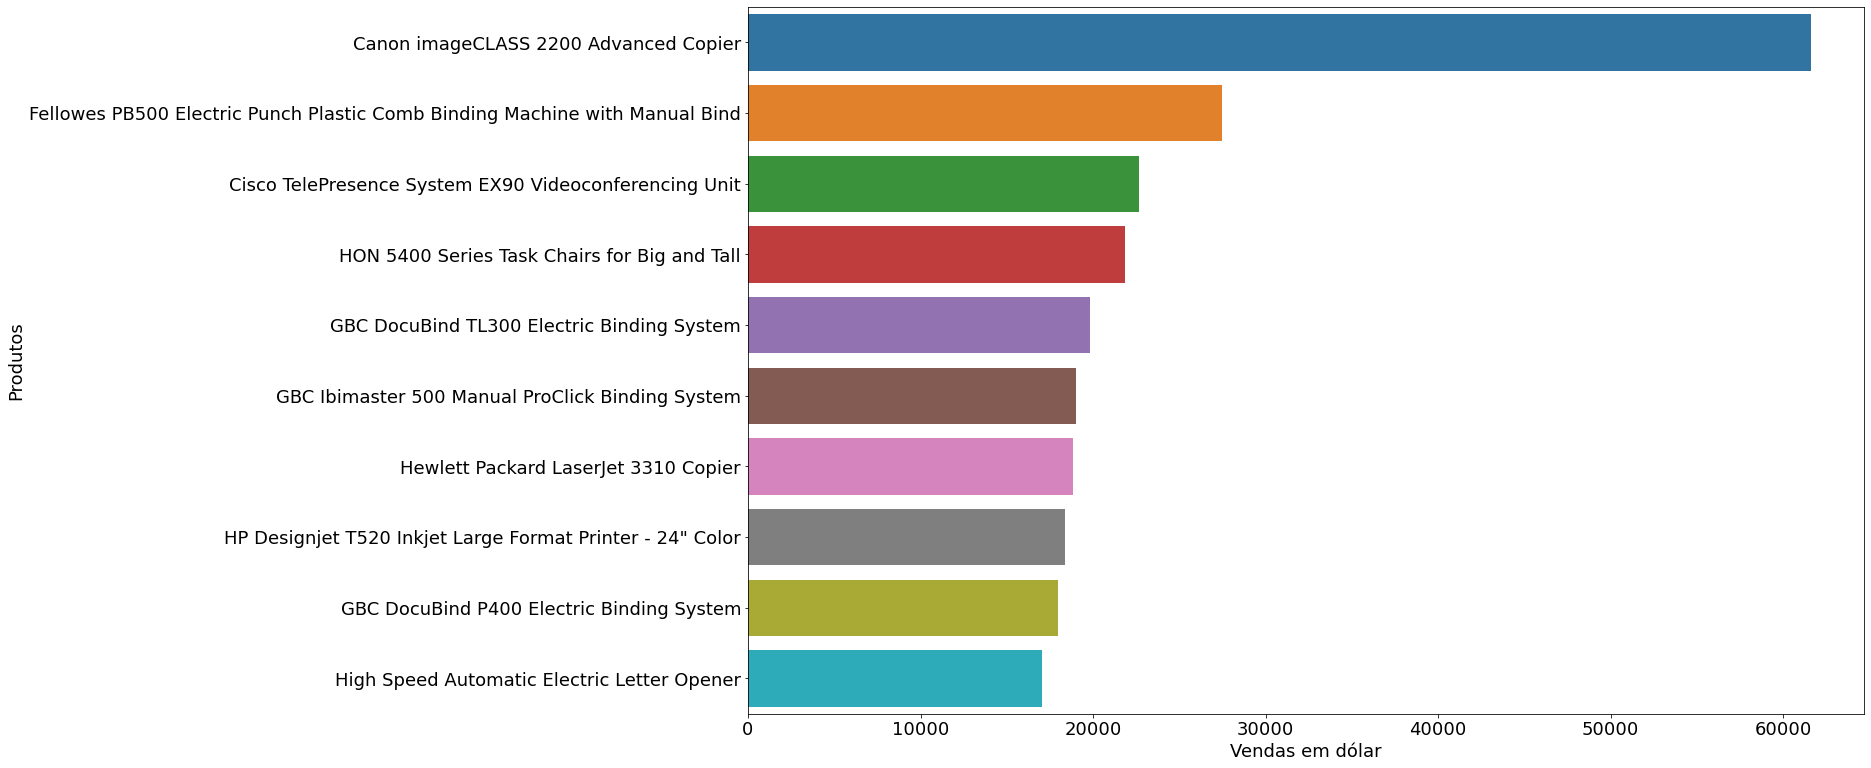

In [254]:

plt.figure(figsize =(20,13))
sns_plot = sb.barplot(x = "Valor do Pedido",y = "Nome do Produto", data = top10_produc_vendas_dolar[:10])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Produtos",fontsize=18)
plt.xlabel("Vendas em dólar",fontsize=18)

Text(0.5, 0, 'Lucro em dólar')

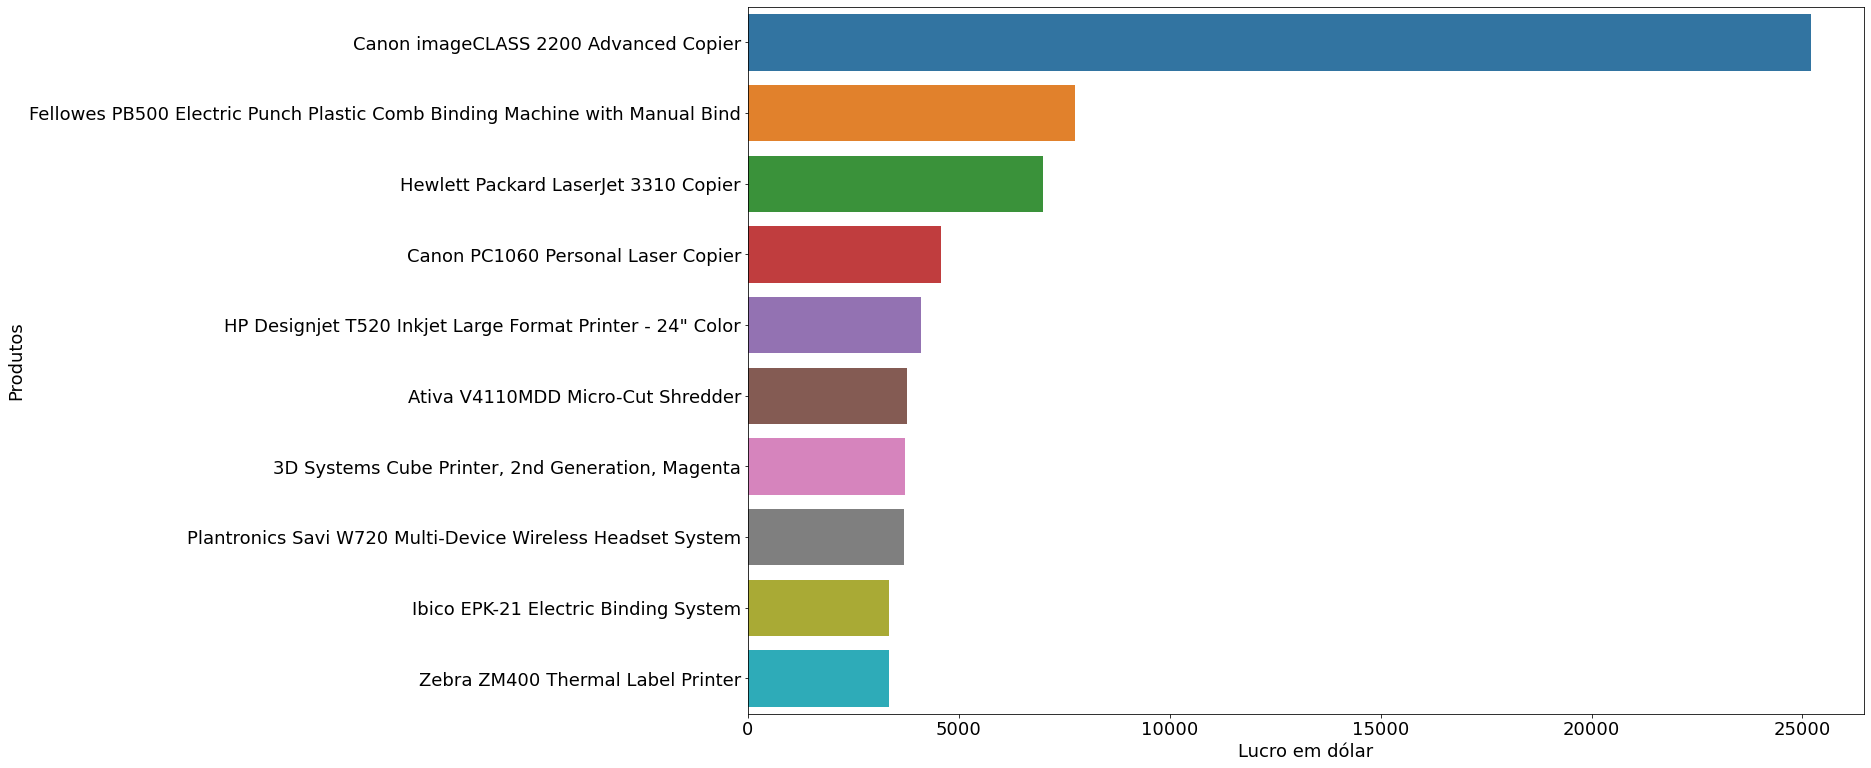

In [262]:
plt.figure(figsize =(20,13))
sns_plot = sb.barplot(x = "Lucro após o desconto",y = "Nome do Produto", data = top10_produc_lucro[:10])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Produtos",fontsize=18)
plt.xlabel("Lucro em dólar",fontsize=18)

## Análise de cesta de mercado
1- Quais produtos devo combinar para formar uma oferta em combo?

In [263]:
df.head()

,ID Pedido,Data do Pedido,Ano do Pedido,Mês do Pedido,Dia do Pedido,Data de envio,Ano de Envio,Mês de Envio,Dia de Envio,Tempo de Envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Desconto em Dólar,Lucro após o desconto,Preço Unitário Produto,Lucro por produto unitário,Lucro por produto unitário (%)
0,CA-2016-152156,2016-11-08,2016,11,8,2016-11-11,2016,11,11,3 days,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,0.0000,41.9136,130.98,20.9568,16.0
1,CA-2016-152156,2016-11-08,2016,11,8,2016-11-11,2016,11,11,3 days,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,0.0000,219.5820,243.98,73.1940,30.0
2,CA-2016-138688,2016-06-12,2016,6,12,2016-06-16,2016,6,16,4 days,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,0.0000,6.8714,7.31,3.4357,47.0
3,US-2015-108966,2015-10-11,2015,10,11,2015-10-18,2015,10,18,7 days,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,783.4725,-383.0310,348.21,80.0883,23.0
4,US-2015-108966,2015-10-11,2015,10,11,2015-10-18,2015,10,18,7 days,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,5.5920,2.5164,13.98,4.0542,29.0


In [301]:
df_duplicated_idorder = df[df["ID Pedido"].duplicated(keep = False)]

df_duplicated_idorder["Produtos Agrupados"] = df_duplicated_idorder.groupby('ID Pedido')['Nome do Produto'].transform(lambda x: '@'.join(x))

df_duplicated_idorder = df_duplicated_idorder[["ID Pedido","Produtos Agrupados"]].drop_duplicates()

df_duplicated_idorder.head(10)

<ipython-input-301-eed18f719131>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicated_idorder["Produtos Agrupados"] = df_duplicated_idorder.groupby('ID Pedido')['Nome do Produto'].transform(lambda x: '@'.join(x))


,ID Pedido,Produtos Agrupados
0,CA-2016-152156,Bush Somerset Collection Bookcase@Hon Deluxe F...
3,US-2015-108966,Bretford CR4500 Series Slim Rectangular Table@...
5,CA-2014-115812,Eldon Expressions Wood and Plastic Desk Access...
14,US-2015-118983,Holmes Replacement Filter for HEPA Air Cleaner...
18,CA-2014-143336,Newell 341@Cisco SPA 501G IP Phone@Wilson Jone...
21,CA-2016-137330,"Newell 318@Acco Six-Outlet Power Strip, 4' Cor..."
25,CA-2016-121755,Wilson Jones Active Use Binders@Imation 8GB Mi...
27,US-2015-150630,"Riverside Palais Royal Lawyers Bookcase, Royal..."
35,CA-2016-117590,GE 30524EE4@Electrix Architect's Clamp-On Swin...
37,CA-2015-117415,"#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Enve..."


In [302]:
count = Counter()

for row in df_duplicated_idorder["Produtos Agrupados"]:
    row_list = row.split('@')
    count.update(Counter(combinations(row_list,2)))

for chave, valor in count.most_common(20):
    print(chave, valor)

('Anker 36W 4-Port USB Wall Charger Travel Power Adapter for iPhone 5s 5c 5', 'Staples') 2
('Staples', 'Square Credit Card Reader, 4 1/2" x 4 1/2" x 1", White') 2
('Sabrent 4-Port USB 2.0 Hub', 'Xerox 1881') 2
('Xerox 1881', 'GBC DocuBind P400 Electric Binding System') 2
('GBC ProClick 150 Presentation Binding System', 'Imation\xa0Secure+ Hardware Encrypted USB 2.0\xa0Flash Drive; 16GB') 2
('Imation\xa0Secure+ Hardware Encrypted USB 2.0\xa0Flash Drive; 16GB', 'Woodgrain Magazine Files by Perma') 2
('Advantus Rolling Storage Box', 'Great White Multi-Use Recycled Paper (20Lb. and 84 Bright)') 2
('Xerox 225', 'Xerox 1894') 2
('Insertable Tab Post Binder Dividers', 'GBC VeloBinder Manual Binding System') 2
('DAX Value U-Channel Document Frames, Easel Back', 'Recycled Easel Ring Binders') 2
('Cisco SPA508G', 'Global Commerce Series High-Back Swivel/Tilt Chairs') 2
('Acco Hanging Data Binders', 'Newell 315') 2
('GBC Plastic Binding Combs', 'Hon Valutask Swivel Chairs') 2
('Xerox 192', 'X-Rac

In [305]:
df_duplicated_idorder2 = df[df["ID Pedido"].duplicated(keep = False)]

df_duplicated_idorder2["Sub Categorias Agrupadas"] = df_duplicated_idorder2.groupby('ID Pedido')['Sub-Categoria'].transform(lambda x: '@'.join(x))

df_duplicated_idorder2 = df_duplicated_idorder2[["ID Pedido","Sub Categorias Agrupadas"]].drop_duplicates()

df_duplicated_idorder2.head(10)

<ipython-input-305-368bd600e420>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicated_idorder2["Sub Categorias Agrupadas"] = df_duplicated_idorder2.groupby('ID Pedido')['Sub-Categoria'].transform(lambda x: '@'.join(x))


,ID Pedido,Sub Categorias Agrupadas
0,CA-2016-152156,Bookcases@Chairs
3,US-2015-108966,Tables@Storage
5,CA-2014-115812,Furnishings@Art@Phones@Binders@Appliances@Tabl...
14,US-2015-118983,Appliances@Binders
18,CA-2014-143336,Art@Phones@Binders
21,CA-2016-137330,Art@Appliances
25,CA-2016-121755,Binders@Accessories
27,US-2015-150630,Bookcases@Binders@Furnishings@Envelopes@Art@Bi...
35,CA-2016-117590,Phones@Furnishings
37,CA-2015-117415,Envelopes@Bookcases@Chairs@Phones


In [309]:
count = Counter()

for row in df_duplicated_idorder2["Sub Categorias Agrupadas"]:
    row_list = row.split('@')
    count.update(Counter(combinations(row_list,2)))

for chave, valor in count.most_common(20):
    print(chave, valor)

('Binders', 'Binders') 228
('Paper', 'Binders') 211
('Paper', 'Paper') 195
('Binders', 'Paper') 188
('Furnishings', 'Binders') 154
('Phones', 'Binders') 148
('Binders', 'Storage') 145
('Paper', 'Storage') 137
('Storage', 'Binders') 135
('Paper', 'Furnishings') 131
('Binders', 'Phones') 127
('Phones', 'Paper') 126
('Furnishings', 'Paper') 122
('Storage', 'Paper') 120
('Binders', 'Accessories') 119
('Binders', 'Furnishings') 118
('Art', 'Paper') 117
('Paper', 'Phones') 117
('Art', 'Binders') 116
('Accessories', 'Paper') 109


In [310]:
df_duplicated_idorder3 = df[df["ID Pedido"].duplicated(keep = False)]

df_duplicated_idorder3["Categorias Agrupadas"] = df_duplicated_idorder3.groupby('ID Pedido')['Categoria'].transform(lambda x: '@'.join(x))

df_duplicated_idorder3 = df_duplicated_idorder3[["ID Pedido","Categorias Agrupadas"]].drop_duplicates()

df_duplicated_idorder3.head(10)

<ipython-input-310-bee289a15e76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicated_idorder3["Categorias Agrupadas"] = df_duplicated_idorder3.groupby('ID Pedido')['Categoria'].transform(lambda x: '@'.join(x))


,ID Pedido,Categorias Agrupadas
0,CA-2016-152156,Furniture@Furniture
3,US-2015-108966,Furniture@Office Supplies
5,CA-2014-115812,Furniture@Office Supplies@Technology@Office Su...
14,US-2015-118983,Office Supplies@Office Supplies
18,CA-2014-143336,Office Supplies@Technology@Office Supplies
21,CA-2016-137330,Office Supplies@Office Supplies
25,CA-2016-121755,Office Supplies@Technology
27,US-2015-150630,Furniture@Office Supplies@Furniture@Office Sup...
35,CA-2016-117590,Technology@Furniture
37,CA-2015-117415,Office Supplies@Furniture@Furniture@Technology


In [311]:
count = Counter()

for row in df_duplicated_idorder3["Categorias Agrupadas"]:
    row_list = row.split('@')
    count.update(Counter(combinations(row_list,2)))

for chave, valor in count.most_common(20):
    print(chave, valor)

('Office Supplies', 'Office Supplies') 3652
('Office Supplies', 'Furniture') 1225
('Furniture', 'Office Supplies') 1204
('Office Supplies', 'Technology') 1171
('Technology', 'Office Supplies') 1097
('Furniture', 'Furniture') 428
('Technology', 'Furniture') 412
('Furniture', 'Technology') 406
('Technology', 'Technology') 361


In [322]:
sns_plot2 = pl.sunburst(df, path = ["Categoria", "Sub-Categoria"],values = "Valor do Pedido", color = "Categoria")
sns_plot2.show()
py.plot(sns_plot2, filename = 'Divisão de categorias e sub-categorias por valor de vendas', auto_open=True)

'https://plotly.com/~victorpinheiromartins/1/'

## Insight sobre compradores
1- Quais os maiores compradores?

In [324]:
df.head()

,ID Pedido,Data do Pedido,Ano do Pedido,Mês do Pedido,Dia do Pedido,Data de envio,Ano de Envio,Mês de Envio,Dia de Envio,Tempo de Envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Desconto em Dólar,Lucro após o desconto,Preço Unitário Produto,Lucro por produto unitário,Lucro por produto unitário (%)
0,CA-2016-152156,2016-11-08,2016,11,8,2016-11-11,2016,11,11,3 days,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,0.0000,41.9136,130.98,20.9568,16.0
1,CA-2016-152156,2016-11-08,2016,11,8,2016-11-11,2016,11,11,3 days,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,0.0000,219.5820,243.98,73.1940,30.0
2,CA-2016-138688,2016-06-12,2016,6,12,2016-06-16,2016,6,16,4 days,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,0.0000,6.8714,7.31,3.4357,47.0
3,US-2015-108966,2015-10-11,2015,10,11,2015-10-18,2015,10,18,7 days,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,783.4725,-383.0310,348.21,80.0883,23.0
4,US-2015-108966,2015-10-11,2015,10,11,2015-10-18,2015,10,18,7 days,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,5.5920,2.5164,13.98,4.0542,29.0


In [372]:
df_sum_cliente_sort = df.groupby(["Nome Cliente"],as_index = False)[["Valor do Pedido","Lucro após o desconto"]].sum().sort_values(by = "Valor do Pedido", ascending = False).head(10)
df_sum_cliente_sort

,Nome Cliente,Valor do Pedido,Lucro após o desconto
686,Sean Miller,25043.050,-1980.7393
730,Tamara Chand,19052.218,8981.3239
622,Raymond Buch,15117.339,6976.0959
757,Tom Ashbrook,14595.620,4703.7883
6,Adrian Barton,14473.571,5444.8055
441,Ken Lonsdale,14175.229,806.8550
671,Sanjit Chand,14142.334,5757.4119
334,Hunter Lopez,12873.298,5622.4292
672,Sanjit Engle,12209.438,2650.6769
156,Christopher Conant,12129.072,2177.0493


In [382]:
figplot1 = pg.Figure(data = [pg.Bar(name = "Lucro", x = df_sum_cliente_sort["Lucro após o desconto"],
                                    y = df_sum_cliente_sort["Nome Cliente"], orientation = "h" ),
                            pg.Bar(name = "Valor bruto vendas",x = df_sum_cliente_sort["Valor do Pedido"], y = df_sum_cliente_sort["Nome Cliente"],orientation = "h")])
figplot1.update_layout(title = "Top 10 Clientes Vendas x Lucro",yaxis_categoryorder = "total ascending")
figplot1.show()

In [383]:
py.plot(figplot1, filename = 'Top 10 clientes vendas x lucros', auto_open=True)

'https://plotly.com/~victorpinheiromartins/4/'

In [387]:
df_sum_cliente_sort_lucro = df.groupby(["Nome Cliente"],as_index = False)["Lucro após o desconto"].sum().sort_values(by = "Lucro após o desconto", ascending = False).head(10)
df_sum_cliente_sort_lucro

,Nome Cliente,Lucro após o desconto
730,Tamara Chand,8981.3239
622,Raymond Buch,6976.0959
671,Sanjit Chand,5757.4119
334,Hunter Lopez,5622.4292
6,Adrian Barton,5444.8055
757,Tom Ashbrook,4703.7883
157,Christopher Martinez,3899.8904
431,Keith Dawkins,3038.6254
35,Andy Reiter,2884.6208
194,Daniel Raglin,2869.0760


In [401]:
figplot2 = pg.Figure(data = [pg.Bar(name = "TOP 10 Lucro por cliente", x = df_sum_cliente_sort_lucro["Lucro após o desconto"],
                                    y = df_sum_cliente_sort_lucro["Nome Cliente"], orientation = "h")])
figplot2.update_layout(title = "TOP 10 Lucro por cliente",yaxis_categoryorder = "total ascending")
figplot2.show()

In [403]:
py.plot(figplot2, filename = 'TOP 10 Lucro por cliente', auto_open=True)

'https://plotly.com/~victorpinheiromartins/6/'

In [404]:
df_sum_cliente_sort_media = df.groupby(["Nome Cliente"],as_index = False)["Valor do Pedido"].mean().sort_values(by = "Valor do Pedido", ascending = False).head(10)
df_sum_cliente_sort_media

,Nome Cliente,Valor do Pedido
547,Mitch Willingham,1751.292000
686,Sean Miller,1669.536667
730,Tamara Chand,1587.684833
307,Grant Thornton,1558.535333
757,Tom Ashbrook,1459.562000
334,Hunter Lopez,1170.299818
90,Bill Shonely,1166.850333
156,Christopher Conant,1102.642909
707,Stefanie Holloman,1048.196000
157,Christopher Martinez,895.402000


In [407]:
figplot3 = pg.Figure(data = [pg.Bar(name = "TOP 10 clientes por ticket médio", x = df_sum_cliente_sort_media["Valor do Pedido"],
                                    y = df_sum_cliente_sort_media["Nome Cliente"], orientation = "h",marker_color = 'green')])
figplot3.update_layout(title = "TOP 10 clientes por ticket médio",yaxis_categoryorder = "total ascending")
figplot3.show()

In [409]:
py.plot(figplot3, filename = 'TOP 10 clientes por ticket médio', auto_open=True)

'https://plotly.com/~victorpinheiromartins/10/'

2 - Em quais regiões se concentram as maiores e menores taxas de vendas?

In [410]:
df.head()

,ID Pedido,Data do Pedido,Ano do Pedido,Mês do Pedido,Dia do Pedido,Data de envio,Ano de Envio,Mês de Envio,Dia de Envio,Tempo de Envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Desconto em Dólar,Lucro após o desconto,Preço Unitário Produto,Lucro por produto unitário,Lucro por produto unitário (%)
0,CA-2016-152156,2016-11-08,2016,11,8,2016-11-11,2016,11,11,3 days,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,0.0000,41.9136,130.98,20.9568,16.0
1,CA-2016-152156,2016-11-08,2016,11,8,2016-11-11,2016,11,11,3 days,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,0.0000,219.5820,243.98,73.1940,30.0
2,CA-2016-138688,2016-06-12,2016,6,12,2016-06-16,2016,6,16,4 days,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,0.0000,6.8714,7.31,3.4357,47.0
3,US-2015-108966,2015-10-11,2015,10,11,2015-10-18,2015,10,18,7 days,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,783.4725,-383.0310,348.21,80.0883,23.0
4,US-2015-108966,2015-10-11,2015,10,11,2015-10-18,2015,10,18,7 days,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,5.5920,2.5164,13.98,4.0542,29.0


In [424]:
df_região_vendas = df[["Região","Valor do Pedido","Estado"]]
df_região_vendas_agrupado = df_região_vendas.groupby(df_região_vendas["Região"], as_index = False)["Valor do Pedido"].sum()
df_região_vendas_agrupado

,Região,Valor do Pedido
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


In [452]:
figplot4 = pl.bar(df_região_vendas_agrupado, x="Região", y = "Valor do Pedido", title = "Vendas por região")
figplot4.show()

In [439]:

def regiao_estado(estado):
    regiao = df.loc[df["Estado"] == estado]["Região"].reset_index()
    regiao_nome = regiao.iloc[0]["Região"]
    return(regiao_nome)

In [442]:
regiao_estado("Kentucky")

'South'

In [446]:
df_região_e_estado_vendas = df_região_vendas.groupby(df_região_vendas["Estado"],as_index =  False)["Valor do Pedido"].sum()
df_região_e_estado_vendas

,Estado,Valor do Pedido
0,Alabama,19510.6400
1,Arizona,35282.0010
2,Arkansas,11678.1300
3,California,457687.6315
4,Colorado,32108.1180
5,Connecticut,13384.3570
6,Delaware,27451.0690
7,District of Columbia,2865.0200
8,Florida,89473.7080
9,Georgia,49095.8400


In [448]:
df_região_e_estado_vendas["Região"] = df_região_e_estado_vendas["Estado"].apply(lambda x: regiao_estado(x))
df_região_e_estado_vendas

,Estado,Valor do Pedido,Região
0,Alabama,19510.6400,South
1,Arizona,35282.0010,West
2,Arkansas,11678.1300,South
3,California,457687.6315,West
4,Colorado,32108.1180,West
5,Connecticut,13384.3570,East
6,Delaware,27451.0690,East
7,District of Columbia,2865.0200,East
8,Florida,89473.7080,South
9,Georgia,49095.8400,South


In [453]:
figplot5 = pl.bar(df_região_e_estado_vendas, x="Região", y = "Valor do Pedido",color = "Estado", title = "Vendas por região e Estado")
figplot5.show()

In [454]:
py.plot(figplot5, filename = 'Vendas por região e Estado', auto_open=True)

'https://plotly.com/~victorpinheiromartins/12/'

In [455]:
py.plot(figplot4, filename = 'Vendas por Região', auto_open=True)

'https://plotly.com/~victorpinheiromartins/14/'

## Sazonalidades
1 - Quais os melhores e piores meses de venda no ano.

In [456]:
df.head()

,ID Pedido,Data do Pedido,Ano do Pedido,Mês do Pedido,Dia do Pedido,Data de envio,Ano de Envio,Mês de Envio,Dia de Envio,Tempo de Envio,ID Cliente,Nome Cliente,Segmento,País,Cidade,Estado,Código Postal,Região,ID Produto,Categoria,Sub-Categoria,Nome do Produto,Valor do Pedido,Quantidade,Desconto,Desconto em Dólar,Lucro após o desconto,Preço Unitário Produto,Lucro por produto unitário,Lucro por produto unitário (%)
0,CA-2016-152156,2016-11-08,2016,11,8,2016-11-11,2016,11,11,3 days,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,0.0000,41.9136,130.98,20.9568,16.0
1,CA-2016-152156,2016-11-08,2016,11,8,2016-11-11,2016,11,11,3 days,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,0.0000,219.5820,243.98,73.1940,30.0
2,CA-2016-138688,2016-06-12,2016,6,12,2016-06-16,2016,6,16,4 days,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,0.0000,6.8714,7.31,3.4357,47.0
3,US-2015-108966,2015-10-11,2015,10,11,2015-10-18,2015,10,18,7 days,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,783.4725,-383.0310,348.21,80.0883,23.0
4,US-2015-108966,2015-10-11,2015,10,11,2015-10-18,2015,10,18,7 days,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,5.5920,2.5164,13.98,4.0542,29.0


In [457]:
df_ano = df.groupby(["Ano do Pedido"],as_index = False)["Valor do Pedido"].sum()
df_mes = df.groupby(["Mês do Pedido"],as_index = False)["Valor do Pedido"].sum()
df_dia = df.groupby(["Dia do Pedido"],as_index = False)["Valor do Pedido"].sum()

In [500]:
figplot6 = pl.line(df_ano, x = "Ano do Pedido", y = "Valor do Pedido", markers = True)
figplot6.update_xaxes(nticks=12,dtick=1)
figplot6.update_layout(xaxis_title = "Anos",yaxis_title = "Faturamento($)",title = "Faturamento por ano")
figplot6.show()

In [583]:
py.plot(figplot6, filename = 'Vendas por Ano', auto_open=True)

'https://plotly.com/~victorpinheiromartins/20/'

In [501]:
figplot7 = pl.line(df_mes, x = "Mês do Pedido", y = "Valor do Pedido", markers = True)
figplot7.update_xaxes(nticks=12,dtick=1)
figplot7.update_layout(xaxis_title = "Meses",yaxis_title = "Faturamento($)",title = "Faturamento por mês")
figplot7.show()

In [584]:
py.plot(figplot7, filename = 'Vendas por Meses', auto_open=True)

'https://plotly.com/~victorpinheiromartins/22/'

In [588]:
figplot8 = pl.line(df_dia, x = "Dia do Pedido", y = "Valor do Pedido", markers = True)
figplot8.update_xaxes(nticks=12)
figplot8.update_layout(xaxis_title = "Dias",yaxis_title = "Faturamento($)",title = "Faturamento por dia")
figplot8.show()

In [585]:
py.plot(figplot8, filename = 'Faturamento por dia', auto_open=True)

'https://plotly.com/~victorpinheiromartins/24/'

In [575]:
df_mes_2014 = df[df["Ano do Pedido"] == 2014].groupby(df["Mês do Pedido"], as_index = False)["Valor do Pedido"].sum()
df_mes_2014["Ano"] = 2014

df_mes_2015 = df[df["Ano do Pedido"] == 2015].groupby(df["Mês do Pedido"], as_index = False)["Valor do Pedido"].sum()
df_mes_2015["Ano"] = 2015

df_mes_2016 = df[df["Ano do Pedido"] == 2016].groupby(df["Mês do Pedido"], as_index = False)["Valor do Pedido"].sum()
df_mes_2016["Ano"] = 2016

df_mes_2017 = df[df["Ano do Pedido"] == 2017].groupby(df["Mês do Pedido"], as_index = False)["Valor do Pedido"].sum()
df_mes_2017["Ano"] = 2017

df_mes_2014["Mês nome"] = ["Janeiro",'Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
df_mes_2015["Mês nome"] = ["Janeiro",'Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
df_mes_2016["Mês nome"] = ["Janeiro",'Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
df_mes_2017["Mês nome"] = ["Janeiro",'Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']


df_mes_ano = df_mes_2014.append([df_mes_2015,df_mes_2016,df_mes_2017])
df_mes_ano

,Valor do Pedido,Ano,Mês nome
0,14236.8950,2014,Janeiro
1,4519.8920,2014,Fevereiro
2,55691.0090,2014,Março
3,28295.3450,2014,Abril
4,23648.2870,2014,Maio
5,34595.1276,2014,Junho
6,33946.3930,2014,Julho
7,27909.4685,2014,Agosto
8,81777.3508,2014,Setembro
9,31453.3930,2014,Outubro


In [587]:
figplot9 = pl.line(df_mes_ano, x="Mês nome", y="Valor do Pedido", color='Ano')
figplot9.update_layout(xaxis_title = "Mês",yaxis_title = "Faturamento($)",title = "Faturamento por mes por ano")
figplot9.show()

In [589]:
py.plot(figplot9, filename = 'Faturamento por mes e ano', auto_open=True)

'https://plotly.com/~victorpinheiromartins/26/'